# Jupyter Notebok 2015 UX Survey - Summary

## Key Findings

The following are the key takeaways from our analysis of the survey response data. The remainder of this notebook gives evidence for these points.

**Experienced Users**

People who use Jupyter frequently (daily/weekly), who have been using it for more than a year, and who have been in their job role for 2+ years are most heavily represented in the survey data. The majority of respondants self-identify as data scientists, students, scientists, and researchers.

**Like the Notebook Concept**

Unsurprisingly, respondents state that they like the ability to quickly analyze, visualize, explore, and describe data in rich notebook documents that they can share. As such, the interactive computing paradigm should remain central to the user experience and continue to improve over time.

**Need More than Notebooks**

Respondents find that the Jupyter Notebook lacks features they require to complete their data analytics workflow. To address these gaps, the respondents request a wide variety of features and integrations. The most common requests are the following:

* Version control (via git in particular)
* Robust text and code editing (like in Emacs, Vim, Sublime, PyCharm)
* Advanced code development tools (debugging, profiling, variable watching, code modularization)
* Simpler export and deployment options (one-click transformations to slides, scripts, reports) 

The project roadmap should incorporate these suggestions to ensure that Jupyter continues to address the needs of end users.

**Need More Help**

Respondents state that installation of Jupyter Notebook should be easier to perform and understand, both for single users and groups of users. Respondents commonly cite documentation, tutorials, and help as ways to improve the situtation.

## About the Survey

In late 2015, members of the Jupyter Community conducted a 16-question survey about the Jupyter Notebook user experience. The survey ran on [SurveyGizmo](https://www.surveygizmo.com/) from December 21, 2015 until January 15, 2016. Posts on the [Project Jupyter Google Group](https://groups.google.com/forum/#!topic/jupyter/XCzJ02Rzj0Y), on the [Jupyter blog](http://blog.jupyter.org/2015/12/22/jupyter-notebook-user-experience-survey/), and from the [@ProjectJupyter Twitter account](https://twitter.com/ProjectJupyter/status/684096608166776832) were used to share the survey link and solicit responses. At the conclusion of the survey, the raw response data were [posted to GitHub](https://github.com/jupyter/design/tree/master/surveys/2015-notebook-ux) along with a description of the data format.

## About our Analysis

Starting with the raw response data, we ([@parente]() and @[jtyberg](), members of the IBM Emerging Technology Group):

1. Toyed with ways to [extract the salient points from the free text responses](1_ux_survey_review.ipynb)
2. Made the data [more pandas-friendly](2_clean_survey.ipynb)
3. Tried a few different approaches to [identifying keyword patterns and aggregating them into themes](3a_hinderance_themes.ipynb)
4. Repeated our keyword pattern search and more subjective annotator theme grouping approach across all remaining free-text questions (e.g., [integration](3b_integration_themes.ipynb), [needs addressed](3c_needs_addressed_themes.ipynb), [needs not addressed](3d_needs_not_addressed_themes.ipynb), etc.)
5. Summarized our findings in this notebook.

## About this Notebook

In this notebook, we lend evidence to the claims made in the executive summary at the top of this notebook. We include written observations, plots, and interactive widgets for exploring the results.

You may:

1. View this notebook as a static webpage on [NBViewer]() or [GitHub](). (No interactivity, one plot per section).
2. Interact with the widgets in this notebook in a dashboard view or notebook view on your own [Binder]() instance.
4. Clone the [jupyter/design](https://github.com/jupyter/design) repository from GitHub and put the notebooks / data on a Jupyter server of your choosing.

<div class="alert alert-info"><b>Keep in mind</b> that respondants did not necessarily answer every survey question. We considered the available responses to a question, regardless of whether the user answered other questions not. As a result, you will see the total responses vary across the plots below, especially if you are interacting with the plots as widgets and choosing to group responses.</div>

### Notebook Setup

If you want to run this notebook yourself in your own environment, ensure you have all of the  the following:

```
numpy==1.10.4
matplotlib==1.5.1
pandas==0.17.0
seaborn==0.7.0
ipywidgets==4.1.1
jupyter_cms==0.4.0
```

In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
%matplotlib inline

In [3]:
import os
import glob
import pandas as pd
import seaborn as sns

In [4]:
%load_ext jupyter_cms

In [5]:
utils = load_notebook('./5_utils.ipynb')

In [6]:
sns.set_palette('deep', n_colors=16)
sns.set(rc={"figure.figsize": (14,6)})

Read the responses with shortened column names.

In [7]:
df = pd.read_csv('survey_short_columns.csv', index_col=0)

Merge in the themes and keywords for the free-text questions.

In [8]:
files = glob.glob('./*_themes.csv')
files.append('./roles.csv')
for fn in files:
    theme_df = pd.read_csv(fn, sep=';', index_col=0)
    df = df.merge(theme_df, left_index=True, right_index=True, how='left')

## About the Survey Respondents

We start with information about the respondants themselves. Most of the questions in this section have a fixed set of possible responses. Only one allows for free text responses.

#### Q1: How often do you use Jupyter Notebook?

The majority of respondants use the notebook on a daily and weekly basis.

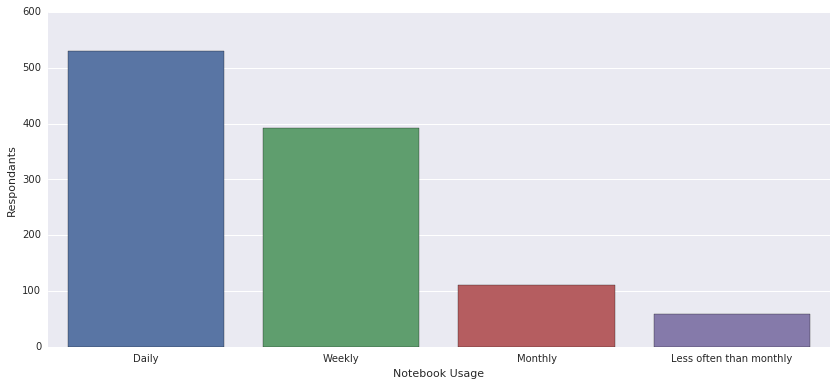

In [9]:
how_often_counts = df.how_often.value_counts().reindex(utils.group_orders['how_often'])
ax = sns.barplot(how_often_counts.index, how_often_counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Notebook Usage')

#### Q3: Roughly how long have you been using Jupyter Notebook?

The majority of respondents have been users Jupyter for longer than a year.

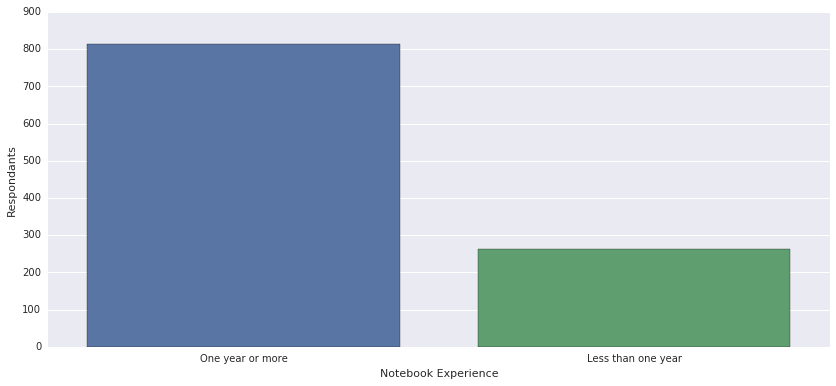

In [10]:
how_long_counts = df.how_long_used.value_counts().reindex(utils.group_orders['how_long_used'])
ax = sns.barplot(how_long_counts.index, how_long_counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Notebook Experience')

The distribution of frequency of use is skewed toward daily/weekly in both the more and less experienced user groups.

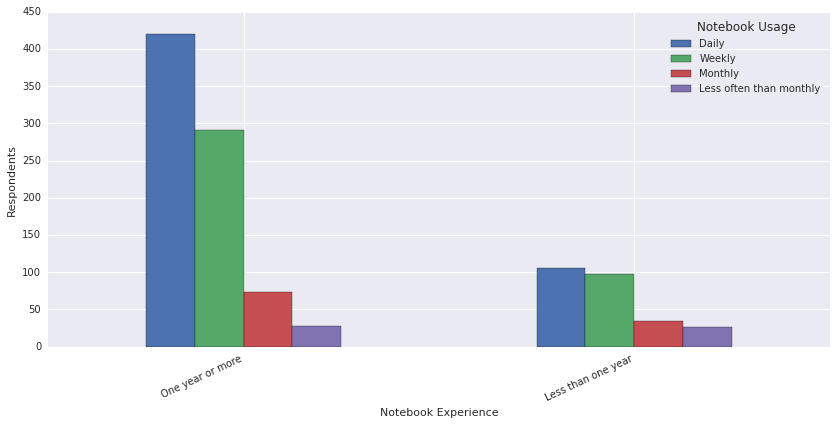

In [11]:
long_x_often = pd.crosstab(df.how_long_used, df.how_often)
long_x_often = long_x_often.reindex(utils.group_orders['how_long_used'], utils.group_orders['how_often'])
long_x_often.columns.name = 'Notebook Usage'
ax = long_x_often.plot(kind='bar')
ax.set_ylabel('Respondents')
ax.set_xlabel('Notebook Experience')
_ = ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=25, ha='right')

#### Q13: What is your primary role when using Jupyter Notebook (e.g., student, astrophysicist, financial modeler, business manager, etc.)?

Most respondents name a single job role (e.g., data scientist). Some state more than one (e.g., student, practicing statistician). Data scientist, student, scientist, researcher, and developer are the most common.

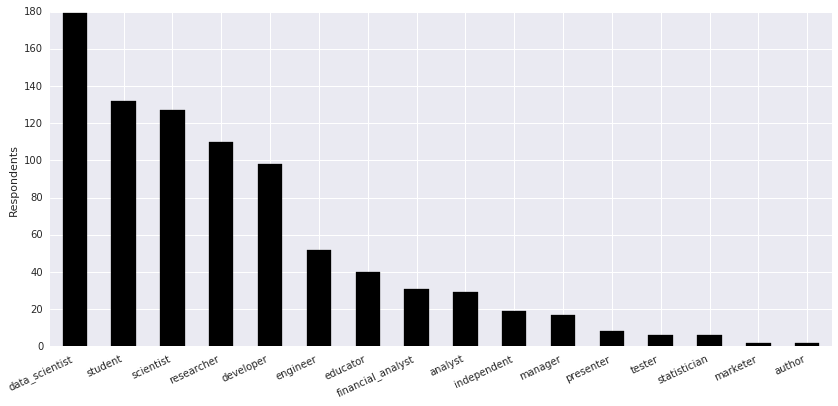

In [12]:
utils.explore(df, [df.roles_roles, df.roles_keywords], utils.default_labels[::-1])

#### Q14: How many years have you been in this role?

Most respondents have 2+ years of experience in their job role.

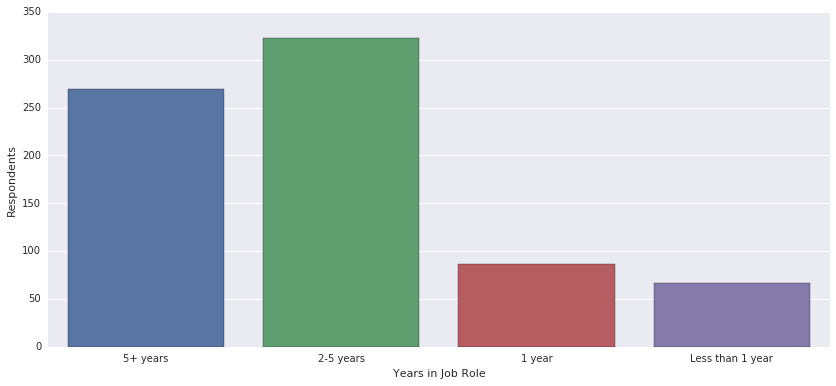

In [13]:
counts = df.years_in_role.value_counts()
counts = counts.reindex(utils.group_orders['years_in_role'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondents')
_ = ax.set_xlabel('Years in Job Role')

#### Q5: How do you run the Jupyter Notebook?

The vast majority of respondants run Jupyter as a standalone application.

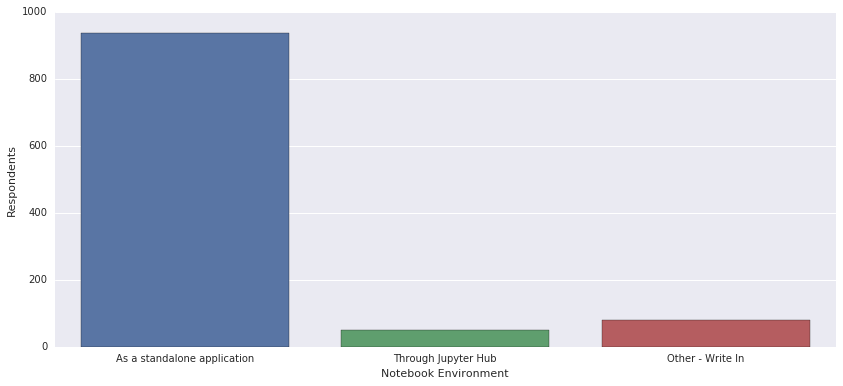

In [14]:
counts = df.how_run.value_counts()
counts = counts.reindex(utils.group_orders['how_run'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondents')
_ = ax.set_xlabel('Notebook Environment')

Write-in responses vary widely. Many are more specific version of "as a standalone application."

In [15]:
df.how_run_other.dropna().sample(20)

856               integrated as Electron into GitHub Atom
1212           Through a custom docker image in kitematic
434                                         dato launcher
1022                                       through django
1466                                             Sagemath
71                      On a remote multiple users server
1608                                        Google Chrome
1335                                  Launches in firefox
725                                            own server
1036                                             I can't.
1131                               via "ipython notebook"
361                                               Browser
279     "ipython notebook" don't know what's that's ca...
987                                 On a VPS through SSH.
19                              Embedded in IBM Analytics
1637                          Stand-alone AND Jupyter Hub
781                                                 spark
1254          

#### Q16: How many people typically see and/or interact with the results of your work in Jupyter Notebook? (Consider people who view your notebooks on nbviewer, colleagues who rerun your notebooks, developers who star your notebook repos on GitHub, audiences who see your notebooks as slideshows, etc.)

Most of the respondents creates notebooks for tens or hundreds of users. Few write for thousands of users or more.

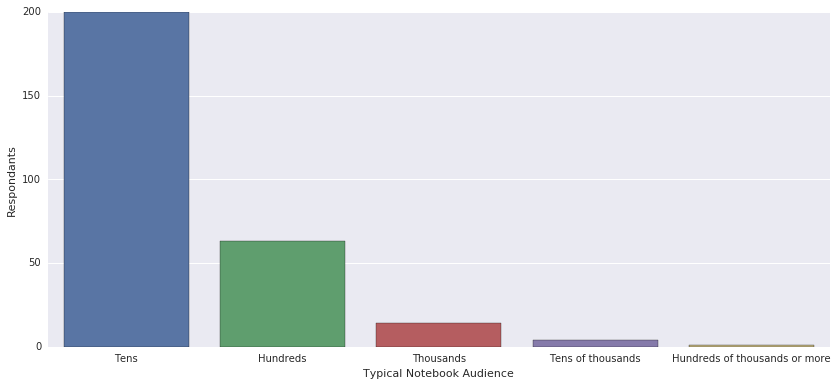

In [16]:
counts = df.audience_size.value_counts()
counts = counts.reindex(utils.group_orders['audience_size'])
ax = sns.barplot(counts.index, counts.values)
ax.set_ylabel('Respondants')
_ = ax.set_xlabel('Typical Notebook Audience')

## What the Respondents Said

TODO: about the responses

#### Q6: What needs in your workflow does Jupyter Notebook address?

Respondents frequently indicate that Jupyter Notebook addresses their need to analyze, explore, visualize, interact with, and document data quickly and easily.

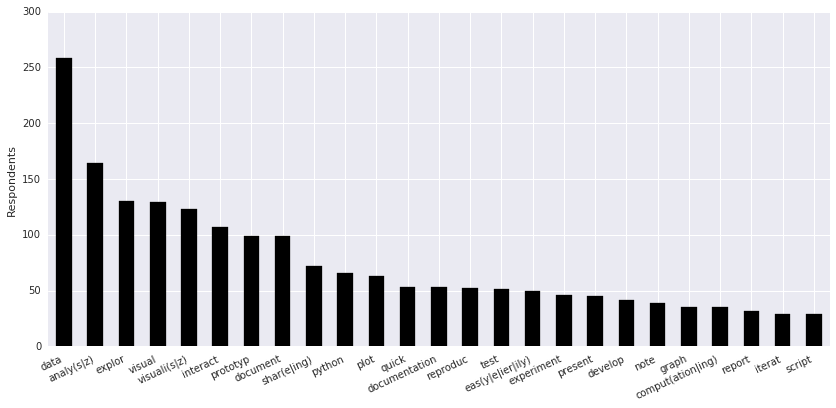

In [18]:
utils.explore(df, [df.workflow_needs_addressed_keywords], 
              labels=['Keyword patterns'])

#### Q8: What aspects of Jupyter Notebook make it pleasant to use in your workflow?

Ease of use, the tight interactive workflow, and the ability to combine inline markup with rich media top the list of pleasant aspects noted by respondents.

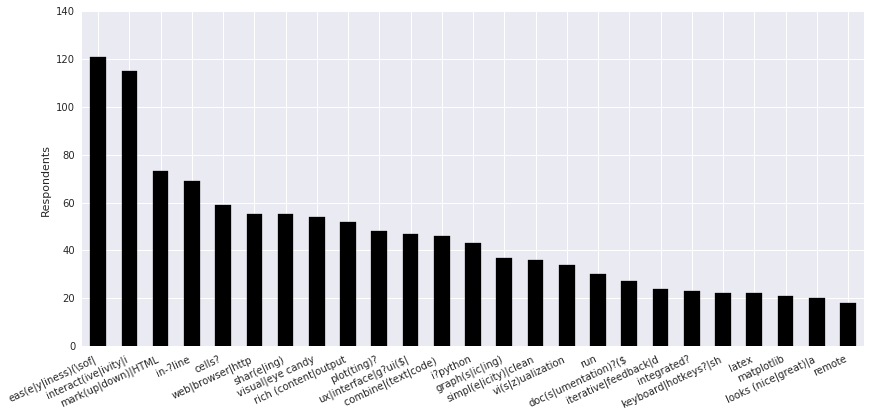

In [19]:
utils.explore(df, [df.pleasant_aspects_keywords, df.pleasant_aspects_themes])

#### Q2: What, if anything, hinders you from making Jupyter Notebook an even more regular part of your workflow?

TODO: hinder findings

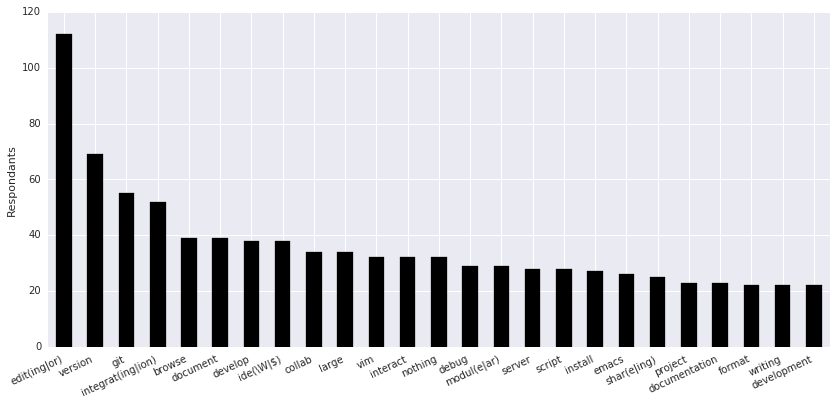

In [18]:
utils.explore(df, df.hinderances_keywords, df.hinderances_themes)

#### Q7: What needs in your workflow does Jupyter Notebook not address?

TODO: needs not findings

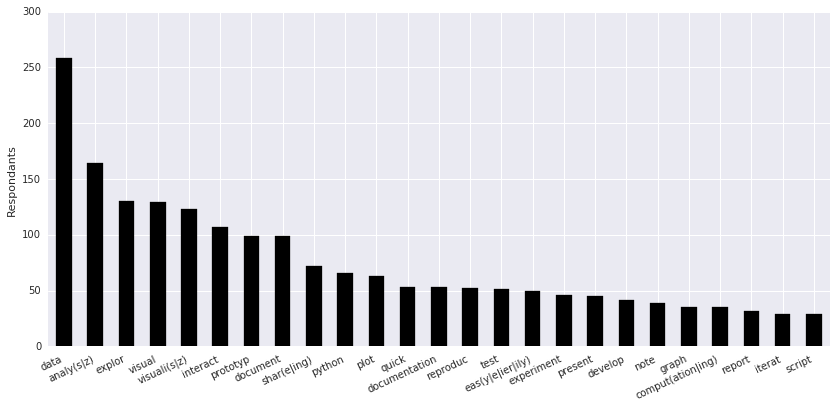

In [19]:
utils.explore(df, df.workflow_needs_addressed_keywords, df.workflow_needs_addressed_themes)

#### Q9: What aspects of Jupyter Notebook make it difficult to use in your workflow?

TODO: difficult aspects findings

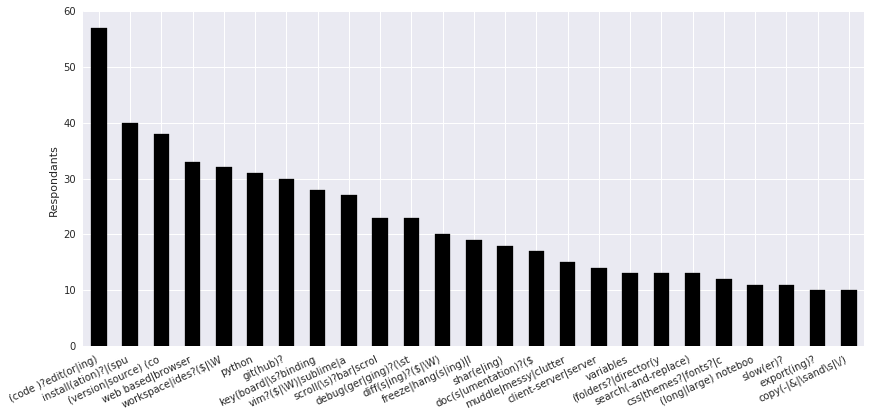

In [20]:
utils.explore(df, df.difficult_aspects_keywords, df.difficult_aspects_themes)

#### Q4: What tools and applications, if any, would you like to see more tightly integrated with Jupyter Notebook?

TODO: integration findings

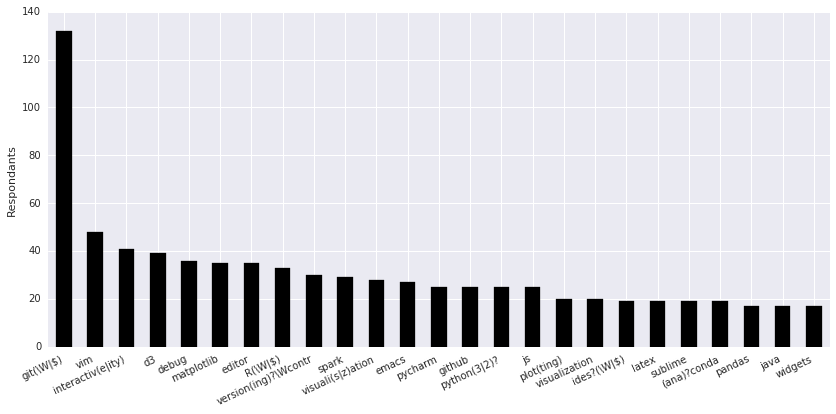

In [21]:
utils.explore(df, df.integrations_keywords, df.integrations_themes)

#### Q10: What new features or changes would you like to see in Jupyter Notebook? (Please list anything that comes to mind that helps you in your workflow, big or small.)

TODO: features findings

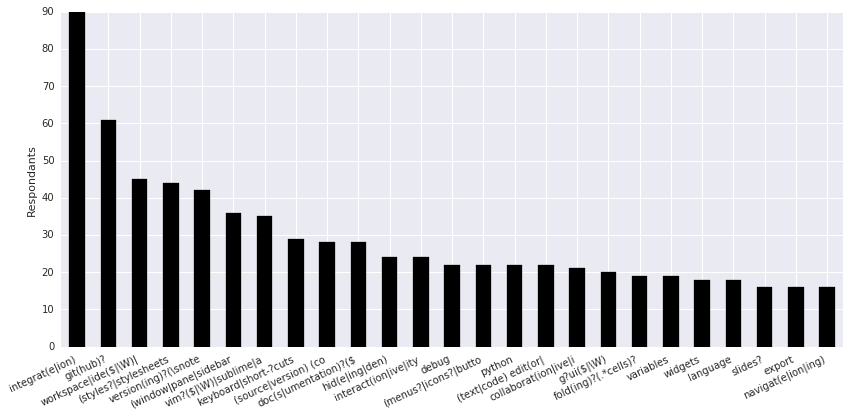

In [22]:
utils.explore(df, df.features_changes_keywords, df.features_changes_themes)

#### Q11: Thinking back to when you first started using Jupyter Notebook, what enhancements would have made your initial experience better?

TODO: first experience findings

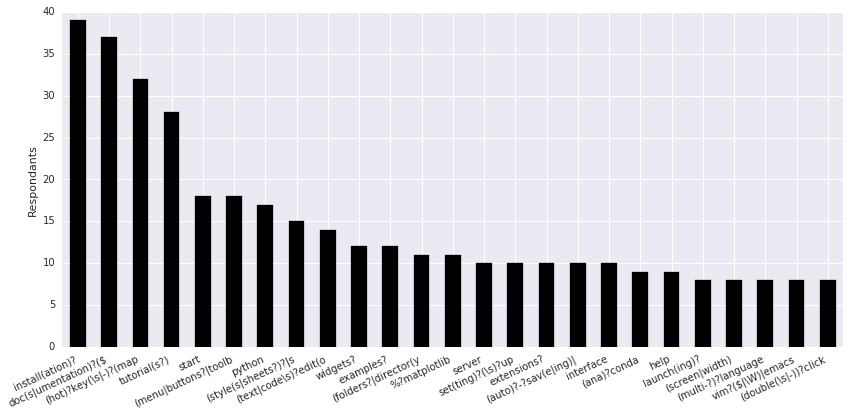

In [23]:
utils.explore(df, df.first_experience_enhancements_keywords, df.first_experience_enhancements_themes)

#### Q12: Select all the words that best describe Jupyter Notebook.

TODO: words findings

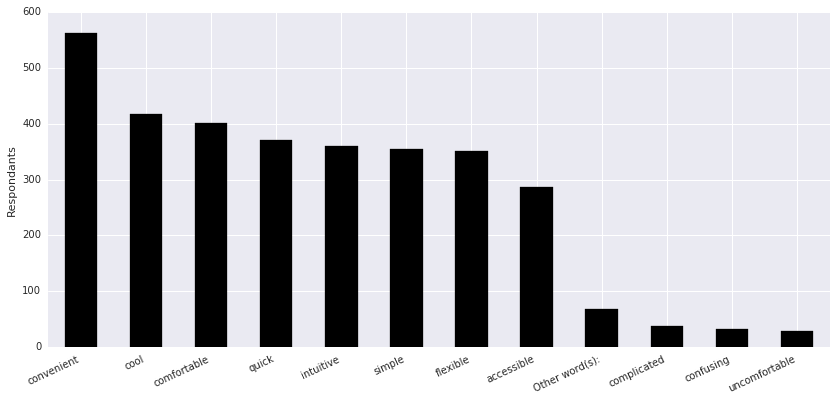

In [24]:
utils.explore(df, df.keywords.str.replace(';',','))

TODO: explain words other

In [25]:
df.keywords_other.value_counts().head(15)

powerful                                            6
awesome                                             3
essential                                           2
magic                                               2
Powerful                                            2
Wonderful                                           1
Basic                                               1
fast                                                1
game-changer                                        1
de-facto standard for data scientist                1
clever                                              1
heavy                                               1
powerful, if you can get just what you want.        1
invaluable, unique, powerful, amazing, potential    1
unflexible                                          1
Name: keywords_other, dtype: int64

## Going Further

TODO: guidance on additional avenues of exploration

## Footnotes

1. pandas 0.17.1 has a bug that causes it to ignore styles when making bar charts. I installed the latest pandas master branch to get around using eye-bleed-blue everywhere.

    ```
    conda install -y cython
    pip install git+https://github.com/pydata/pandas.git
    ```